In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch,set_seed
from bayes_opt.sequentialBO.boil import BOIL
from bayes_opt.curve_compression import return_logistic_curve

from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

set_seed(1337)


W1116 16:26:25.371580  6316 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Specifying the search space

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)), ('alpha', (1e-6,1e-2)), ('maxEpisodes',(200, 500))])


varParams = list(SearchSpace.keys())

# These are the fixed hyperparamters for Dueling DQN

In [3]:
fixedParams = OrderedDict([
        ("DDQN", True),
        ("Duelling", True),
        ("buffer_size", 5000),
        ("batch_sz", 64),
        ("maxSteps", 200),
        ("PER", 0),
        ("alpha", 1.0),
        ("update_rate", 1),
        ("architecture", [50,50]),
        ("maxExp", 10000),
        ("eps_0", 1.0),
        ("eps_final", 0.05),
        ("beta_time", 1000),
        ("beta_0", 0.6),
        ("beta_final", 1.0)])


# Initializing the DDQN on CartPole-v0 environment

In [4]:
myfunction=drl_experiments.DRL_experiment("DQN", "CartPole-v0", varParams, fixedParams, SearchSpace)


# Initializing BOIL class

In [5]:
acq_name='ei_mu_max'

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initializing BOIL with 3*[no_of_hyperparameter] points

In [6]:
n_init_points=3*myfunction.input_dim
print("initialization {} points - please wait...".format(n_init_points))
boil.init(n_init_points)

initialization 9 points - please wait...
Max #augmented points 10 	 #augmented points  8 	 Augmented points:  [0.    0.1   0.239 0.363 0.5   0.651 0.794 0.902]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []


# Running BOIL over multiple iterations

In [7]:
NN=10*myfunction.input_dim
print("Running BOIL for {} iterations".format(NN))
strFolderOut="run_experiments\plot"

for index in tqdm(range(0,NN)):
    boil.suggest_nextpoint()


Running BOIL for 30 iterations


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 10.9
selected point from acq func: [0.6422 0.3951 0.2172] acq val=log(Utility/Cost)= -0.2857
Max #augmented points 2 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9284 0.004 ] t=265 current y=27.06, ybest=133.64


  3%|██▋                                                                             | 1/30 [05:48<2:48:30, 348.65s/it]

ln of conditioning number of GP covariance matrix 10.9
==estimated lengthscale_x=0.1401 lengthscale_t=0.574 Logistic midpoint=-0.1 Logistic growth=1.1
selected point from acq func: [1. 1. 0.] acq val=log(Utility/Cost)= -1.0836
[original scale] x=[1.   0.01] t=200 current y=1.16, ybest=133.64


  7%|█████▎                                                                          | 2/30 [06:59<2:03:49, 265.35s/it]

ln of conditioning number of GP covariance matrix 11.2
selected point from acq func: [1. 0. 0.] acq val=log(Utility/Cost)= -1.3557
[original scale] x=[1. 0.] t=200 current y=1.25, ybest=133.64


 10%|████████                                                                        | 3/30 [08:02<1:32:03, 204.56s/it]

ln of conditioning number of GP covariance matrix 11.2
selected point from acq func: [0.6868 0.6489 1.    ] acq val=log(Utility/Cost)= -1.5545
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9374 0.0065] t=500 current y=123.27, ybest=133.64


 13%|██████████▋                                                                     | 4/30 [23:34<3:03:16, 422.93s/it]

ln of conditioning number of GP covariance matrix 11.2
selected point from acq func: [0.     0.4202 0.653 ] acq val=log(Utility/Cost)= -1.8393
Max #augmented points 6 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0042] t=396 current y=95.58, ybest=133.64


 17%|█████████████▎                                                                  | 5/30 [36:10<3:37:49, 522.76s/it]

ln of conditioning number of GP covariance matrix 11.2
selected point from acq func: [0.159 0.    0.   ] acq val=log(Utility/Cost)= -1.9099
[original scale] x=[0.8318 0.    ] t=200 current y=10.72, ybest=133.64


 20%|████████████████                                                                | 6/30 [40:01<2:54:02, 435.11s/it]

ln of conditioning number of GP covariance matrix 11.2
selected point from acq func: [0.5247 1.     1.    ] acq val=log(Utility/Cost)= -2.0663
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9049 0.01  ] t=500 current y=135.37, ybest=135.37


 23%|██████████████████▋                                                             | 7/30 [57:56<4:00:26, 627.23s/it]

ln of conditioning number of GP covariance matrix 11.3
==estimated lengthscale_x=0.1974 lengthscale_t=0.513 Logistic midpoint=1.6 Logistic growth=0.8
selected point from acq func: [0.2532 1.     0.4093] acq val=log(Utility/Cost)= -1.9549
Max #augmented points 4 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8506 0.01  ] t=323 current y=38.96, ybest=135.37


 27%|████████████████████▊                                                         | 8/30 [1:08:25<3:50:08, 627.67s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.     0.4463 1.    ] acq val=log(Utility/Cost)= -2.2505
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0045] t=500 current y=95.18, ybest=135.37


 30%|███████████████████████▍                                                      | 9/30 [1:24:48<4:17:02, 734.39s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.2222 0.3144 0.7916] acq val=log(Utility/Cost)= -3.3731
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8444 0.0031] t=437 current y=82.53, ybest=135.37


 33%|█████████████████████████▋                                                   | 10/30 [1:39:21<4:18:40, 776.05s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.3895 1.     1.    ] acq val=log(Utility/Cost)= -2.794
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8779 0.01  ] t=500 current y=122.20, ybest=135.37


 37%|████████████████████████████▏                                                | 11/30 [1:58:34<4:41:30, 888.97s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.     0.5439 0.    ] acq val=log(Utility/Cost)= -3.07
[original scale] x=[0.8    0.0054] t=200 current y=5.67, ybest=135.37


 40%|██████████████████████████████▊                                              | 12/30 [2:02:52<3:29:52, 699.57s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.677 1.    0.79 ] acq val=log(Utility/Cost)= -2.9243
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9354 0.01  ] t=437 current y=79.00, ybest=135.37


 43%|█████████████████████████████████▎                                           | 13/30 [2:15:44<3:24:24, 721.44s/it]

ln of conditioning number of GP covariance matrix 11.5
==estimated lengthscale_x=0.1773 lengthscale_t=0.493 Logistic midpoint=1.4 Logistic growth=0.8
selected point from acq func: [0.     1.     0.3838] acq val=log(Utility/Cost)= -2.195
Max #augmented points 3 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8  0.01] t=315 current y=35.93, ybest=135.37


 47%|███████████████████████████████████▉                                         | 14/30 [2:25:47<3:02:55, 685.98s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.1312 0.6895 0.7434] acq val=log(Utility/Cost)= -4.398
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8262 0.0069] t=423 current y=85.43, ybest=135.37


 50%|██████████████████████████████████████▌                                      | 15/30 [2:40:52<3:07:51, 751.46s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.5892 0.9009 1.    ] acq val=log(Utility/Cost)= -2.9235
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9178 0.009 ] t=500 current y=119.05, ybest=135.37


 53%|█████████████████████████████████████████                                    | 16/30 [2:57:24<3:12:10, 823.64s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.2897 0.5025 1.    ] acq val=log(Utility/Cost)= -3.389
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8579 0.005 ] t=500 current y=125.59, ybest=135.37


 57%|███████████████████████████████████████████▋                                 | 17/30 [3:16:06<3:17:54, 913.41s/it]

ln of conditioning number of GP covariance matrix 11.6
selected point from acq func: [1.     0.5374 0.    ] acq val=log(Utility/Cost)= -4.0002
[original scale] x=[1.     0.0054] t=200 current y=0.72, ybest=135.37


 60%|██████████████████████████████████████████████▏                              | 18/30 [3:17:10<2:11:43, 658.59s/it]

ln of conditioning number of GP covariance matrix 11.6
selected point from acq func: [1. 1. 1.] acq val=log(Utility/Cost)= -4.3503
Max #augmented points 10 	 #augmented points  8 	 Augmented points:  [0.    0.115 0.19  0.343 0.483 0.625 0.762 0.888]
[original scale] x=[1.   0.01] t=466 current y=7.81, ybest=135.37


 63%|████████████████████████████████████████████████▊                            | 19/30 [3:19:21<1:31:42, 500.21s/it]

ln of conditioning number of GP covariance matrix 11.6
selected point from acq func: [0.9221 0.6823 1.    ] acq val=log(Utility/Cost)= -1.8025
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.179 0.446 0.604 0.748 0.885]
[original scale] x=[0.9844 0.0068] t=465 current y=59.34, ybest=135.37


 67%|███████████████████████████████████████████████████▎                         | 20/30 [3:27:50<1:23:48, 502.84s/it]

ln of conditioning number of GP covariance matrix 11.7
selected point from acq func: [0.6708 1.     1.    ] acq val=log(Utility/Cost)= -0.8841
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9342 0.01  ] t=500 current y=101.76, ybest=135.37


 70%|█████████████████████████████████████████████████████▉                       | 21/30 [3:42:17<1:31:47, 611.96s/it]

ln of conditioning number of GP covariance matrix 11.8
selected point from acq func: [0.7707 0.024  1.    ] acq val=log(Utility/Cost)= -2.1332
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.167 0.407 0.583 0.733 0.884]
[original scale] x=[0.9541 0.0002] t=465 current y=84.81, ybest=135.37


 73%|████████████████████████████████████████████████████████▍                    | 22/30 [3:54:58<1:27:34, 656.76s/it]

ln of conditioning number of GP covariance matrix 11.8
selected point from acq func: [0.     0.8393 1.    ] acq val=log(Utility/Cost)= -2.9365
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0084] t=500 current y=125.40, ybest=135.37


 77%|███████████████████████████████████████████████████████████                  | 23/30 [4:14:33<1:34:46, 812.34s/it]

ln of conditioning number of GP covariance matrix 11.8
==estimated lengthscale_x=0.1088 lengthscale_t=0.418 Logistic midpoint=-3.0 Logistic growth=0.5
selected point from acq func: [0.4197 1.     0.7143] acq val=log(Utility/Cost)= -2.1619
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8839 0.01  ] t=414 current y=113.77, ybest=135.37


 80%|█████████████████████████████████████████████████████████████▌               | 24/30 [4:29:36<1:23:55, 839.31s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.6076 0.1979 1.    ] acq val=log(Utility/Cost)= -3.358
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9215 0.002 ] t=500 current y=122.54, ybest=135.37


 83%|████████████████████████████████████████████████████████████████▏            | 25/30 [4:47:12<1:15:22, 904.42s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.5354 0.     1.    ] acq val=log(Utility/Cost)= -3.5184
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9071 0.    ] t=500 current y=119.09, ybest=135.37


 87%|██████████████████████████████████████████████████████████████████▋          | 26/30 [5:04:19<1:02:45, 941.35s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.     0.9905 1.    ] acq val=log(Utility/Cost)= -3.5946
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0099] t=500 current y=118.13, ybest=135.37


 90%|███████████████████████████████████████████████████████████████████████        | 27/30 [5:21:44<48:36, 972.29s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0. 0. 1.] acq val=log(Utility/Cost)= -4.2566
Max #augmented points 10 	 #augmented points  7 	 Augmented points:  [0.    0.12  0.17  0.411 0.592 0.731 0.887]
[original scale] x=[0.8 0. ] t=466 current y=117.38, ybest=135.37


 93%|████████████████████████████████████████████████████████████████████████▊     | 28/30 [5:39:29<33:20, 1000.24s/it]

ln of conditioning number of GP covariance matrix 11.5
==estimated lengthscale_x=0.1126 lengthscale_t=0.469 Logistic midpoint=-1.5 Logistic growth=0.6
selected point from acq func: [0.     0.8183 0.7312] acq val=log(Utility/Cost)= -2.5156
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0082] t=419 current y=113.09, ybest=135.37


 97%|████████████████████████████████████████████████████████████████████████████▎  | 29/30 [5:54:29<16:10, 970.05s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.     0.2093 1.    ] acq val=log(Utility/Cost)= -3.5856
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0021] t=500 current y=119.64, ybest=135.37


100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [6:12:02<00:00, 995.05s/it]


# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

100%|██████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<?, ?it/s]


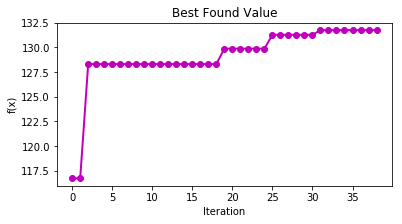

In [8]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Plot the training curve of the best found hyperparameter

Best found hyperparameter = [0.826237   0.00689534]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

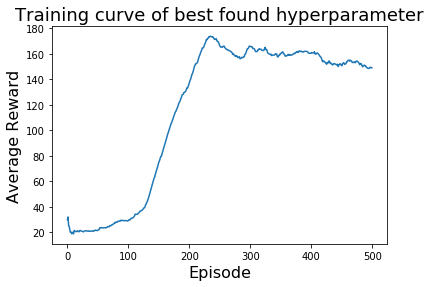

In [9]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
T_max=boil.SearchSpace[-1,1]

curve,time=myfunction.func([boil.X_original[idxMax,:-1],T_max])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Play the CartPole environment using the best found hyperparameter

In [13]:
boil.X_original[idxMax]

array([0.826237  , 0.00689534])

# Plot the Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Log of Cond Number of Cov Matrix')

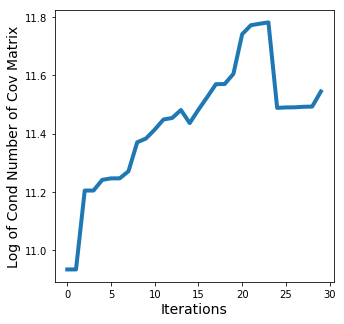

In [11]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Log of Cond Number of Cov Matrix',fontsize=14)

# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=-1.5 $g_0$=0.6')

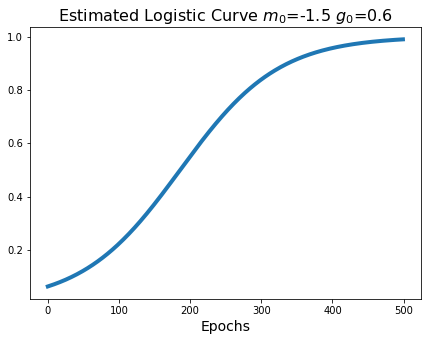

In [12]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)